In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
import numpy as np
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

np.random.seed(3)

(X_train, Y_train), (X_test_org, Y_test_org) = mnist.load_data()



In [13]:
X_val = X_train[11000:12000]
Y_val = Y_train[11000:12000]
X_train = X_train[8000:11000]
Y_train = Y_train[8000:11000]
X_test = X_test_org[2000:3000]
Y_test = Y_test_org[2000:3000]

X_train = X_train.reshape(3000, 28,28,1).astype('float32') / 255.0
X_val = X_val.reshape(1000, 28,28,1).astype('float32') / 255.0
X_test = X_test.reshape(1000, 28,28,1).astype('float32') / 255.0


In [14]:
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

In [20]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
hist = model.fit(X_train, Y_train, epochs=5, batch_size=10, validation_data=(X_val, Y_val))

print('Mean Accuracy: ',np.mean(hist.history['acc']))
print('Mean Loss: ',np.mean(hist.history['loss']))
print('Mean Val Accuracy: ',np.mean(hist.history['val_acc']))
print('Mean Val Loss: ',np.mean(hist.history['val_loss']))


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)             

1000/1000 [==============================] - 0s 220us/sample - loss: 0.1571 - acc: 0.9590
Test loss: 0.15714662003985722
Test accuracy: 0.959


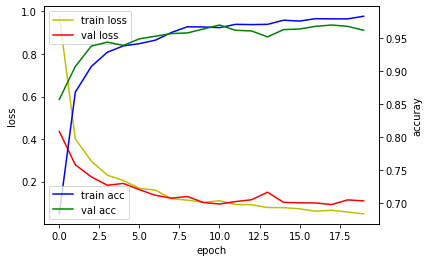

In [21]:
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=10)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [9]:
(OX_train, OY_train), (OX_test, OY_test) = fashion_mnist.load_data()
OX_test = OX_test[:1000]
OY_test = OY_test[:1000]
OY_test = to_categorical(OY_test)
OX_test_reshape = OX_test.reshape(1000, 28,28,1).astype('float32') / 255.0
test_loss, test_acc = model.evaluate(OX_test_reshape, OY_test, batch_size=10)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

predictions = model.predict(OX_test_reshape)

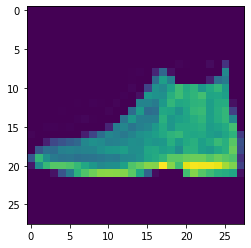

[4.9073310e-03 4.8056915e-02 8.6369818e-01 5.0074114e-03 7.0940790e-05
 6.2821000e-03 6.8286315e-02 2.1732425e-04 3.4250855e-03 4.8412490e-05]


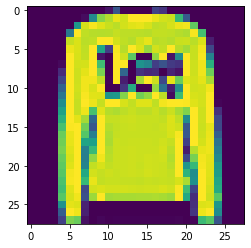

[1.1249481e-03 1.1704048e-05 2.3803514e-04 2.0028394e-05 1.4243784e-04
 5.4895993e-02 7.2177351e-02 1.6923666e-05 8.7102163e-01 3.5092395e-04]


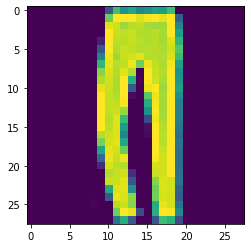

[1.14157915e-01 6.23051601e-05 5.96141210e-03 2.24476826e-05
 1.12403010e-03 3.20489693e-04 1.18684676e-02 2.45225121e-04
 8.66137624e-01 1.00011013e-04]


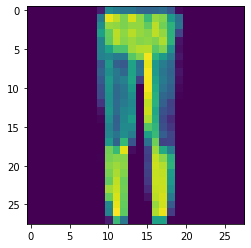

[1.4894317e-04 2.6546892e-02 7.5731963e-02 1.3120588e-03 1.4251645e-04
 1.2557791e-03 3.8460878e-04 2.3830168e-04 8.9418387e-01 5.5131637e-05]


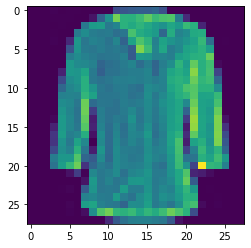

[0.17272021 0.03633295 0.12096229 0.08358333 0.0500229  0.03653969
 0.09166083 0.03887118 0.25993153 0.10937516]


In [10]:
for i in range(5):
    plt.imshow(OX_test[i])
    plt.show()
    print(predictions[i])

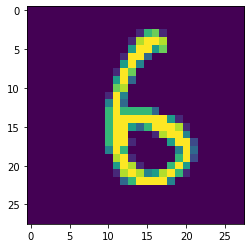

Original:  6
Predicted probabilities:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted Y:  6


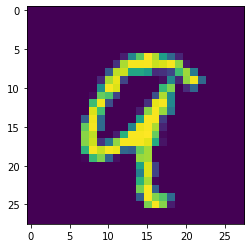

Original:  9
Predicted probabilities:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted Y:  9


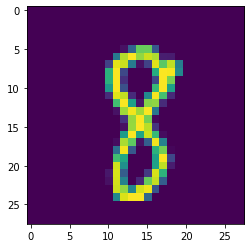

Original:  8
Predicted probabilities:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted Y:  8


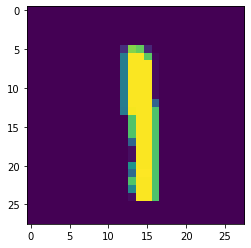

Original:  1
Predicted probabilities:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted Y:  1


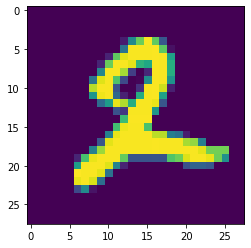

Original:  2
Predicted probabilities:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Predicted Y:  2


In [11]:
X_check = X_test_org[3000:4000]
X_check = X_check.reshape(1000,28,28,1)
Xpredictions = model.predict(X_check)

for i in range(3000,3005):
    plt.imshow(X_test_org[i])
    plt.show()
    print ("Original: ",Y_test_org[i])
    print("Predicted probabilities: ",Xpredictions[i-3000])
    print("Predicted Y: ",np.argmax(Xpredictions[i-3000]))